# LSTM - time series prediction

# Data preparation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
data_path = 'C:\\Users\\Duo\\Downloads\\ride_hour.csv'
rides = pd.read_csv(data_path)

rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# turn dummy fields into numerical values
dummy_fields = ['season', 'weathersit', 'mnth', 'yr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# drop unnecessary columns
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'yr']
data = rides.drop(fields_to_drop, axis=1)

In [4]:
# standardize numerical values
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

for each in quant_features:
    s = data[each].copy()
    mean, std =  s.mean(),  s.std()
    s = (s - mean)/std
    data[each] = s

In [5]:
# train test split
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data['cnt']

In [6]:
window_size = 6

#get the time dimension, window_size is the previous time steps we want
def get_data(feature_arr, target_arr, window_size):
    for n in range(0, feature_arr.shape[0]-window_size):
        x = feature_arr[n:n+window_size]
        y = target_arr[n+window_size]
        yield x, y
        
#For LSTM [batch_size, Length, Features]
feature_time = []
target_time = []

for x, y in get_data(features.values, targets.values, window_size):
    feature_time.append(x)
    target_time.append(y)

feature_time = np.array(feature_time)
target_time = np.array(target_time)

In [7]:
feature_time.shape

(17373, 6, 34)

In [8]:
feature_time[0]

array([[ 0.        ,  0.        , -1.33460919,  0.94734524, -1.55384381,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        , -1.43847501,  0.89551293, -1.55384381,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
  

In [9]:
features.iloc[0]

hr              0.000000
holiday         0.000000
temp           -1.334609
hum             0.947345
windspeed      -1.553844
season_1        1.000000
season_2        0.000000
season_3        0.000000
season_4        0.000000
weathersit_1    1.000000
weathersit_2    0.000000
weathersit_3    0.000000
weathersit_4    0.000000
mnth_1          1.000000
mnth_2          0.000000
mnth_3          0.000000
mnth_4          0.000000
mnth_5          0.000000
mnth_6          0.000000
mnth_7          0.000000
mnth_8          0.000000
mnth_9          0.000000
mnth_10         0.000000
mnth_11         0.000000
mnth_12         0.000000
yr_0            1.000000
yr_1            0.000000
weekday_0       0.000000
weekday_1       0.000000
weekday_2       0.000000
weekday_3       0.000000
weekday_4       0.000000
weekday_5       0.000000
weekday_6       1.000000
Name: 0, dtype: float64

In [10]:
features.iloc[5]

hr              5.000000
holiday         0.000000
temp           -1.334609
hum             0.636351
windspeed      -0.821460
season_1        1.000000
season_2        0.000000
season_3        0.000000
season_4        0.000000
weathersit_1    0.000000
weathersit_2    1.000000
weathersit_3    0.000000
weathersit_4    0.000000
mnth_1          1.000000
mnth_2          0.000000
mnth_3          0.000000
mnth_4          0.000000
mnth_5          0.000000
mnth_6          0.000000
mnth_7          0.000000
mnth_8          0.000000
mnth_9          0.000000
mnth_10         0.000000
mnth_11         0.000000
mnth_12         0.000000
yr_0            1.000000
yr_1            0.000000
weekday_0       0.000000
weekday_1       0.000000
weekday_2       0.000000
weekday_3       0.000000
weekday_4       0.000000
weekday_5       0.000000
weekday_6       1.000000
Name: 5, dtype: float64

In [11]:
target_time[0]

-1.0334945088476482

In [12]:
targets.iloc[6]

-1.0334945088476482

In [13]:
feature_time[-1]

array([[17.        ,  0.        , -1.23074336, -0.76312116, -0.82146002,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [18.        ,  0.        , -1.23074336, -0.76312116, -0.45608552,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
  

In [14]:
features.iloc[-2]

hr              22.000000
holiday          0.000000
temp            -1.230743
hum             -0.348463
windspeed       -0.456086
season_1         1.000000
season_2         0.000000
season_3         0.000000
season_4         0.000000
weathersit_1     1.000000
weathersit_2     0.000000
weathersit_3     0.000000
weathersit_4     0.000000
mnth_1           0.000000
mnth_2           0.000000
mnth_3           0.000000
mnth_4           0.000000
mnth_5           0.000000
mnth_6           0.000000
mnth_7           0.000000
mnth_8           0.000000
mnth_9           0.000000
mnth_10          0.000000
mnth_11          0.000000
mnth_12          1.000000
yr_0             0.000000
yr_1             1.000000
weekday_0        0.000000
weekday_1        1.000000
weekday_2        0.000000
weekday_3        0.000000
weekday_4        0.000000
weekday_5        0.000000
weekday_6        0.000000
Name: 17377, dtype: float64

In [15]:
target_time[-1]

-0.7743808746449239

In [16]:
targets.iloc[-1]

-0.7743808746449239

In [17]:
# train test split
X_train, y_train = feature_time[:-60*24], target_time[:-60*24].reshape(-1,1)
X_test, y_test = feature_time[-60*24:], target_time[-60*24:].reshape(-1,1)

In [18]:
X_train.shape

(15933, 6, 34)

In [19]:
y_train.shape

(15933, 1)

In [20]:
X_test.shape

(1440, 6, 34)

In [21]:
y_test.shape

(1440, 1)

# Keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

res = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2)

Using TensorFlow backend.


Epoch 1/10
 - 2s - loss: 0.4834
Epoch 2/10
 - 1s - loss: 0.2660
Epoch 3/10
 - 1s - loss: 0.1501
Epoch 4/10
 - 1s - loss: 0.1097
Epoch 5/10
 - 1s - loss: 0.0977
Epoch 6/10
 - 1s - loss: 0.0834
Epoch 7/10
 - 1s - loss: 0.0752
Epoch 8/10
 - 1s - loss: 0.0753
Epoch 9/10
 - 1s - loss: 0.0723
Epoch 10/10
 - 1s - loss: 0.0706


In [23]:
#Returns the loss value & metrics values for the test data
model.evaluate(X_test, y_test)

1440/1440 [==============================] - 0s 136us/step


0.14899646780557102

In [24]:
predictions = model.predict(X_test)

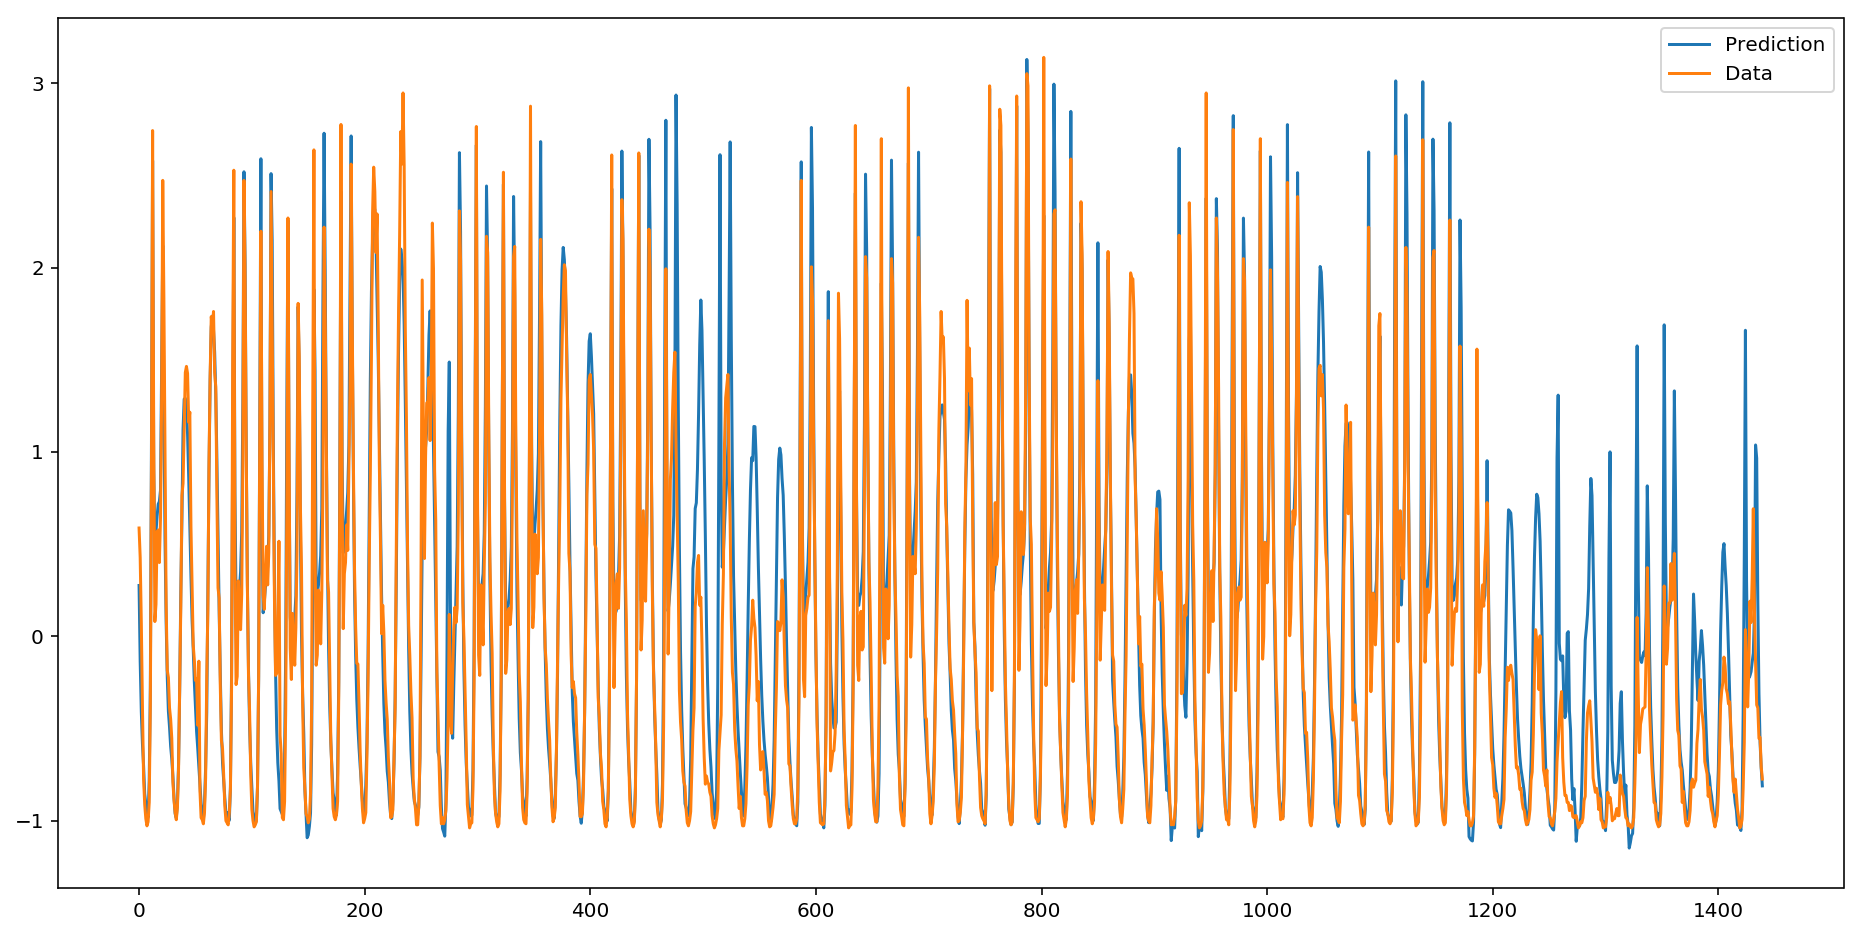

In [25]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(predictions, label='Prediction')
ax.plot(y_test, label='Data')
ax.legend()

# Tensorflow

In [26]:
def get_batch(inputs, targets, batch_size):
    for i in range(0, inputs.shape[0], batch_size):
        yield inputs[i:i+batch_size], targets[i:i+batch_size]

In [27]:
import tensorflow as tf

x=tf.placeholder(tf.float32,[None, X_train.shape[1], X_train.shape[2]])
y=tf.placeholder(tf.float32,[None, 1])

# Tensorflow: old solution

In [28]:
cell = tf.nn.rnn_cell.MultiRNNCell(
                                    [tf.nn.rnn_cell.LSTMCell(num_units=lstm_size, reuse=tf.AUTO_REUSE) 
                                     for lstm_size in [64, 32]]
                                  )
print(cell.state_size)

(LSTMStateTuple(c=64, h=64), LSTMStateTuple(c=32, h=32))


In [29]:
lstm_out, state = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
print(lstm_out.shape)

(?, 6, 32)


In [30]:
output = tf.layers.dense(units=1, inputs=lstm_out[:, -1, :])
print(output.shape)

(?, 1)


# Tensorflow: new solution, almost identical to Keras

In [31]:
cells = [
        tf.keras.layers.LSTMCell(64),
        tf.keras.layers.LSTMCell(32)
        ]

lstm_out = tf.keras.layers.RNN(cells, return_sequences=True)(x)

print(lstm_out.shape)

(?, 6, 32)


In [32]:
output = tf.keras.layers.Dense(1)(lstm_out[:,-1,:])
print(output.shape)

(?, 1)


In [33]:
# mean squared error cost function
cost = tf.reduce_mean(tf.square(output-y))

train = tf.train.AdamOptimizer(0.001).minimize(cost)

In [34]:
# Accuracy calculation
accuracy = tf.reduce_mean(tf.square(output-y))

In [35]:
# Initialize and train
init = tf.global_variables_initializer()

In [36]:
#Train the model
epoches=10

with tf.Session() as sess:
    sess.run(init)
    for step in range(epoches):
        for x_in_batch, y_in_batch in get_batch(X_train, y_train, batch_size=128):
            sess.run(train, feed_dict={x: x_in_batch, y: y_in_batch})
            
        print('step {0} of {1}'.format(step+1, epoches))

# Returns the accuracy value for the test data
    print(sess.run(accuracy, feed_dict={x: X_test, y: y_test}))
    predictions = sess.run(output, feed_dict={x: X_test, y: y_test})

step 1 of 10
step 2 of 10
step 3 of 10
step 4 of 10
step 5 of 10
step 6 of 10
step 7 of 10
step 8 of 10
step 9 of 10
step 10 of 10
0.3323491


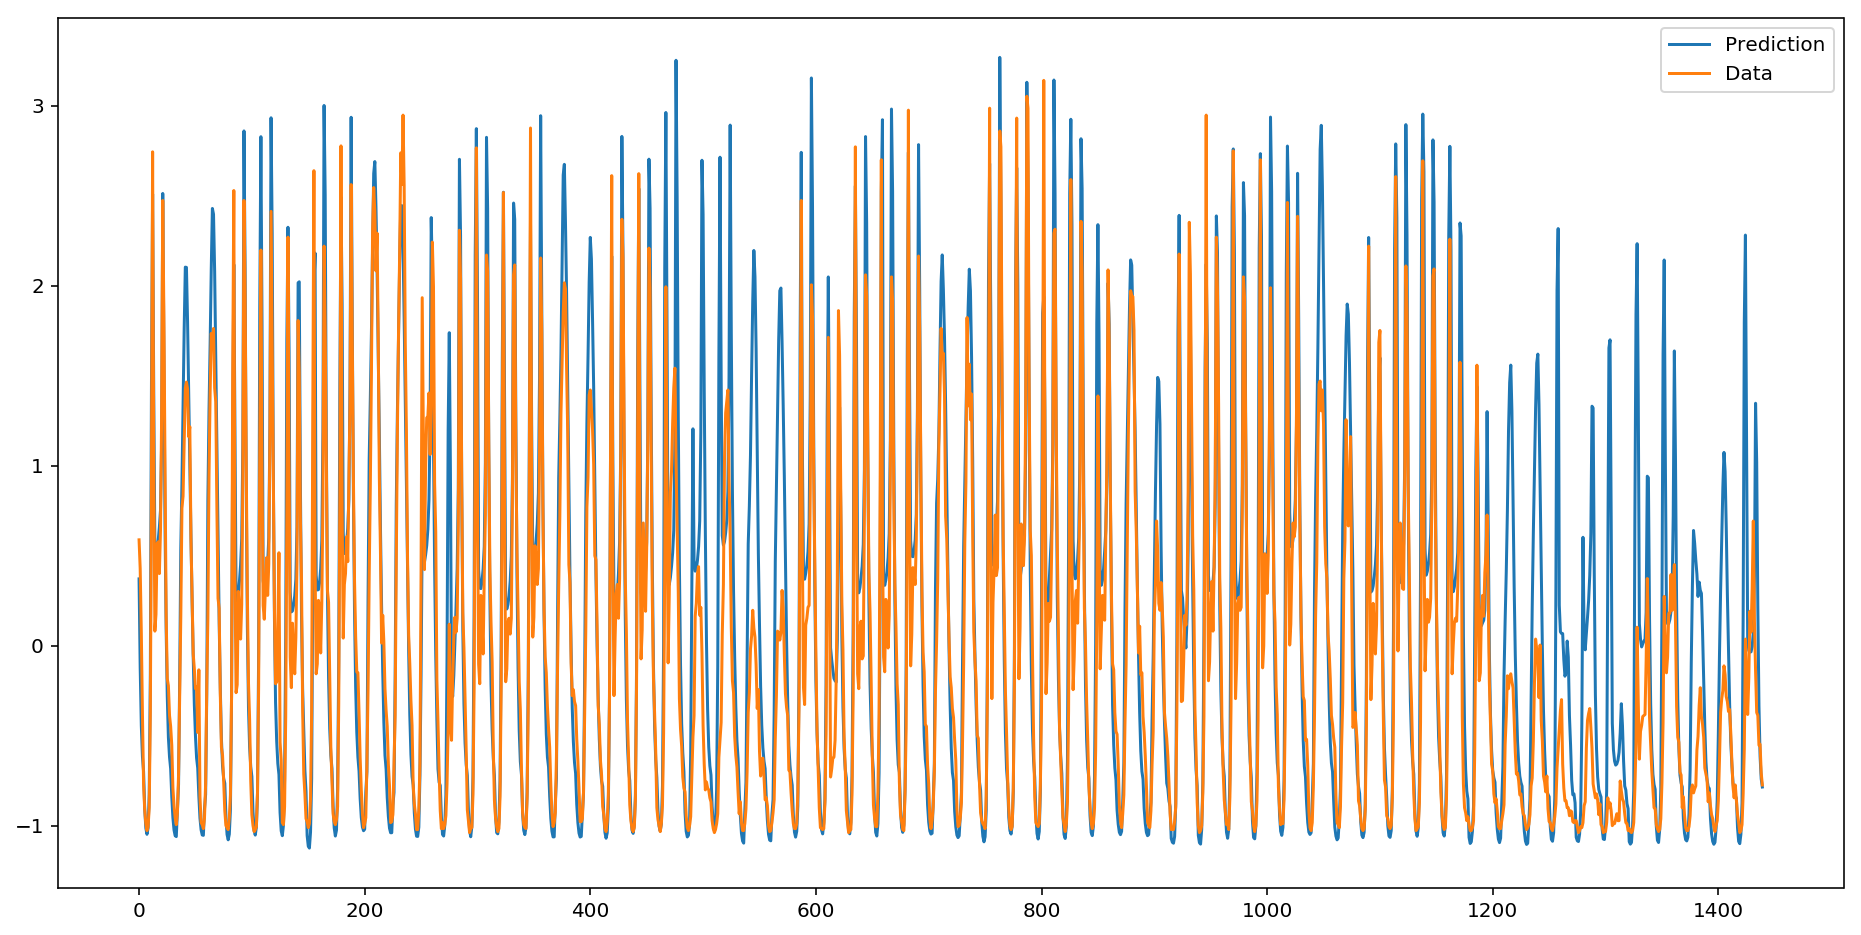

In [37]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(predictions, label='Prediction')
ax.plot(y_test, label='Data')
ax.legend()

# Pytorch

In [38]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class RNN(nn.Module):

    def __init__(self):
        super(RNN, self).__init__()     
        self.lstm1 = nn.LSTM(input_size = X_train.shape[2], 
                             hidden_size = 64, 
                             batch_first=True)

        self.lstm2 = nn.LSTM(input_size = 64,
                             hidden_size = 32, 
                             batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.2)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)
    
        # lstm outputs
        lstm_out = lstm_out2.contiguous()[:,-1,:].view(x.size(0), 32)
        out = self.fc(lstm_out)
        
        return out

# initialize the NN
model = RNN()
print(model)

RNN(
  (lstm1): LSTM(34, 64, batch_first=True)
  (lstm2): LSTM(64, 32, batch_first=True)
  (dropout): Dropout(p=0.2)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [39]:
import torch
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001, weight_decay=0)

In [40]:
# number of epochs to train the model
n_epochs = 10

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for x_in_batch, y_in_batch in get_batch(X_train, y_train, batch_size=128):
        x_in_batch = torch.from_numpy(x_in_batch).float()
        y_in_batch = torch.from_numpy(y_in_batch).float()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(x_in_batch)
        # calculate the loss
        loss = criterion(output, y_in_batch)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/(np.ceil(len(X_train)/128))

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.760362
Epoch: 2 	Training Loss: 0.584006
Epoch: 3 	Training Loss: 0.462746
Epoch: 4 	Training Loss: 0.338609
Epoch: 5 	Training Loss: 0.226056
Epoch: 6 	Training Loss: 0.184440
Epoch: 7 	Training Loss: 0.174818
Epoch: 8 	Training Loss: 0.170869
Epoch: 9 	Training Loss: 0.172043
Epoch: 10 	Training Loss: 0.131909


In [41]:
#Returns the accuracy value for the test data
model.eval()
test_loss = 0
    
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
    
output = model(X_test)
loss = criterion(output, y_test)
test_loss = loss.item()

print('Test Loss: {:.6f}'.format(test_loss))

Test Loss: 0.340121


In [42]:
output = output.data.numpy()
y_test = y_test.data.numpy()

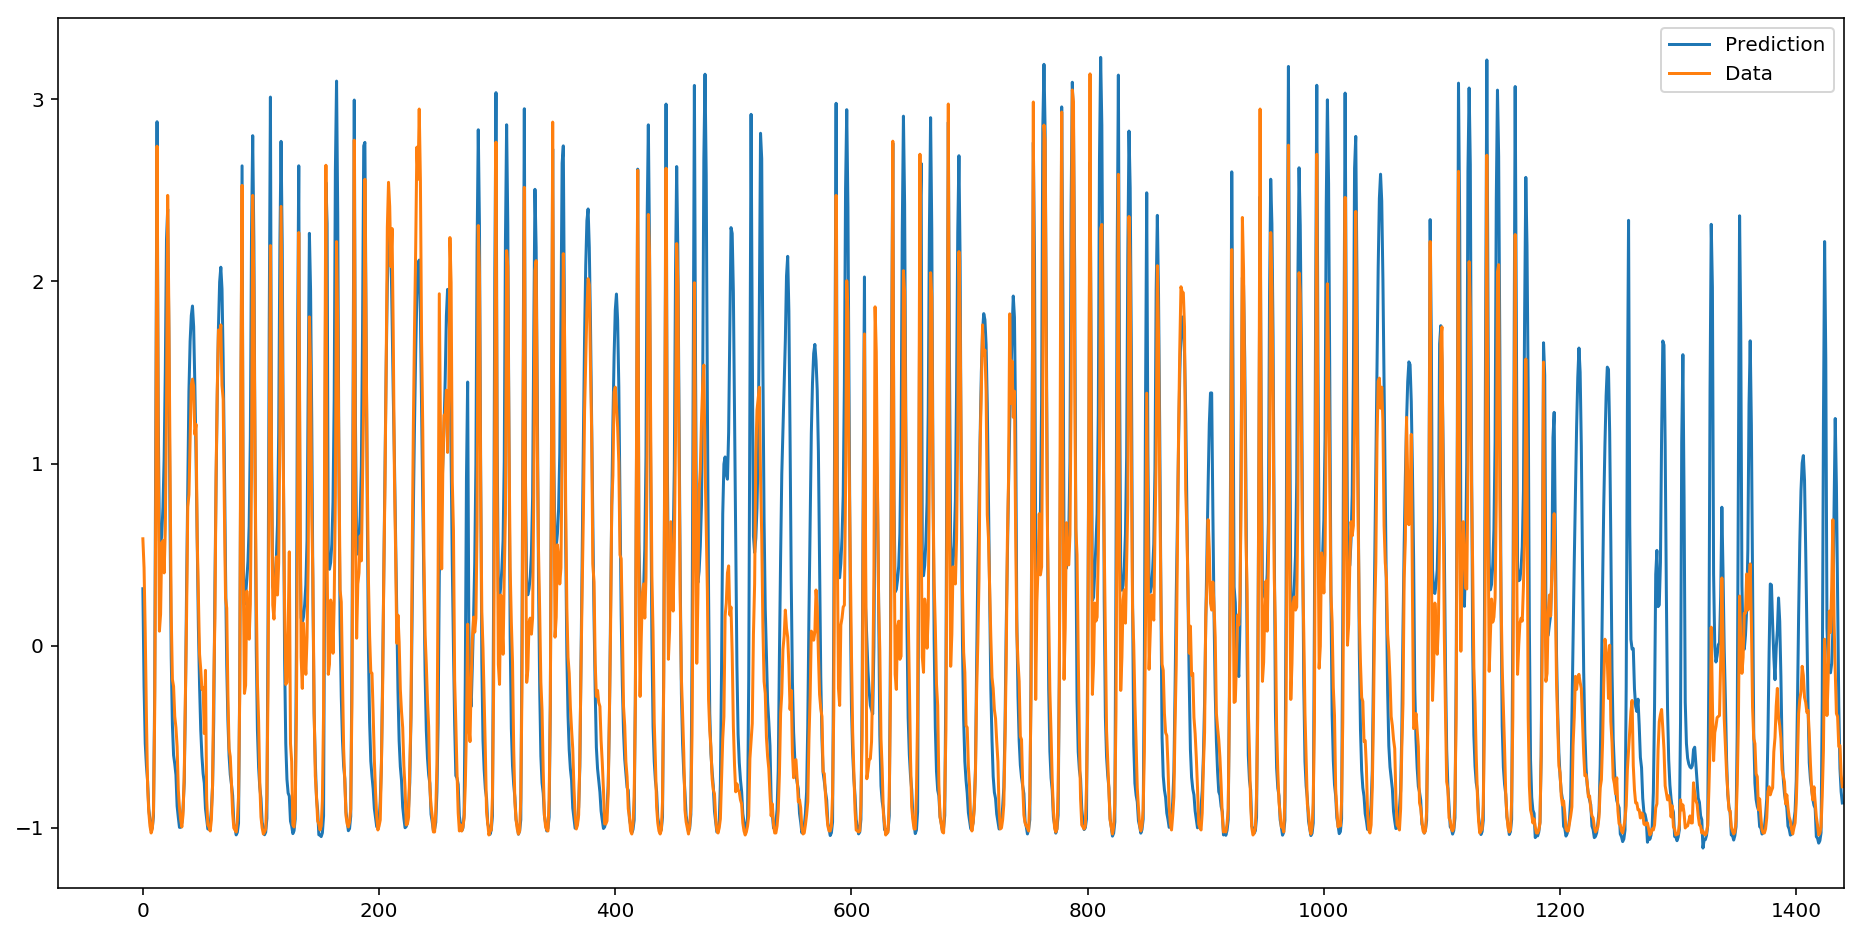

In [43]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(output, label='Prediction')
ax.plot(y_test, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()